Sample Data:
    Age  Spending_Score
0    18              80
1    20              75
2    22              78
3    25              60
4    27              65
5    30              55
6    35              50
7    40              40
8    45              35
9    50              30
10   52              20
11   55              25
12   60              15
13   65              10

Data with Cluster Labels:
    Age  Spending_Score  Cluster
0    18              80        2
1    20              75        2
2    22              78        2
3    25              60        0
4    27              65        2
5    30              55        0
6    35              50        0
7    40              40        0
8    45              35        1
9    50              30        1
10   52              20        1
11   55              25        1
12   60              15        1
13   65              10        1

Cluster Centers (Age, Spending_Score):
[[32.5  51.25]
 [54.5  22.5 ]
 [21.75 74.5 ]]


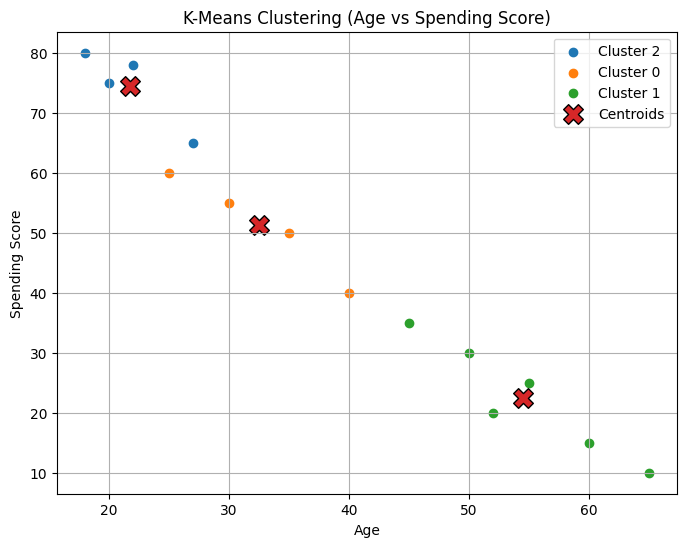

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = {
    "Age": [18, 20, 22, 25, 27, 30, 35, 40, 45, 50, 52, 55, 60, 65],
    "Spending_Score": [80, 75, 78, 60, 65, 55, 50, 40, 35, 30, 20, 25, 15, 10]
}

df = pd.DataFrame(data)
print("Sample Data:")
print(df)

X = df[["Age", "Spending_Score"]] #- features


kmeans = KMeans(n_clusters=3, random_state= 42)

kmeans.fit(X)


df["Cluster"] = kmeans.labels_

print("\nData with Cluster Labels:")
print(df)


print("\nCluster Centers (Age, Spending_Score):")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))


for cluster_id in df["Cluster"].unique():
    # Filter rows that belong to this cluster
    cluster_data = df[df["Cluster"] == cluster_id]
    plt.scatter(
        cluster_data["Age"],
        cluster_data["Spending_Score"],
        label=f"Cluster {cluster_id}"
    )

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    marker="X",
    edgecolor="black",
    label="Centroids"
)

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering (Age vs Spending Score)")
plt.legend()
plt.grid(True)
plt.show()


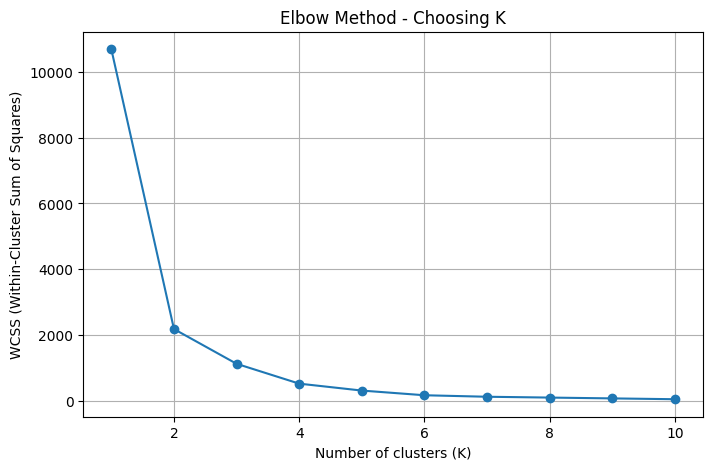

In [3]:
wcss = [] 
#WCSS - withing centroid sum of squares

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10  # number of times the algorithm runs with different initial centroids
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot K vs WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method - Choosing K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

First 5 rows of data:
   customer_id  customer_acct_num first_name  last_name    customer_address  \
0            1        87462024688      Sheri     Nowmer    2433 Bailey Road   
1            2        87470586299    Derrick    Whelply  2219 Dewing Avenue   
2            3        87475757600     Jeanne      Derry     7640 First Ave.   
3            4        87500482201    Michael     Spence       337 Tosca Way   
4            5        87514054179       Maya  Gutierrez     8668 Via Neruda   

  customer_city customer_state_province  customer_postal_code  \
0      Tlaxiaco                  Oaxaca                 15057   
1         Sooke                      BC                 17172   
2      Issaquah                      WA                 73980   
3       Burnaby                      BC                 74674   
4        Novato                      CA                 57355   

  customer_country   birthdate  ... yearly_income gender total_children  \
0           Mexico   8/26/1961  ...  

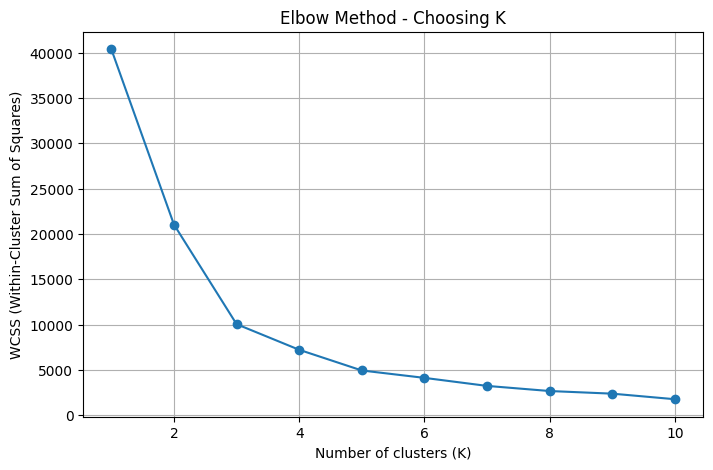


Chosen number of clusters (K): 4

Sample rows with cluster labels:
   total_children  num_children_at_home  Cluster
0               4                     2        1
1               1                     0        3
2               1                     1        3
3               4                     4        1
4               3                     0        0
5               3                     0        0
6               2                     1        0
7               2                     2        0
8               5                     3        1
9               4                     0        2

Cluster Centers (total_children, num_children_at_home):
[[2.400927   0.44843569]
 [3.86115613 3.2004322 ]
 [4.31853786 0.13002611]
 [0.66111655 0.21351616]]


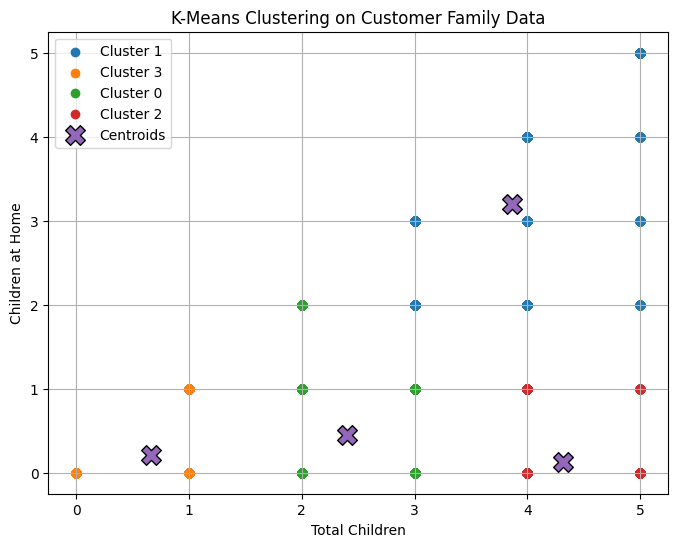

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("MavenMarket_Customers.csv")

print("First 5 rows of data:")
print(df.head())

# 3. Select the columns we want to use for clustering
#    We choose simple numeric columns so students can relate:
#    - total_children
#    - num_children_at_home
X = df[["total_children", "num_children_at_home"]]

print("\nColumns used for clustering:")
print(X.head())


wcss = []  # list to store Within-Cluster Sum of Squares (WCSS)

# Try different values of K (number of clusters)
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10   # run algorithm 10 times with different initial centroids
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot K vs WCSS
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker="o")
plt.title("Elbow Method - Choosing K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# After looking at the graph, choose K where the "elbow" appears.
# For example, if the elbow looks like K = 3, set:
optimal_k = 4  # <-- change this based on your elbow plot

print("\nChosen number of clusters (K):", optimal_k)

kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

# 5. Fit the model (learn the clusters from data)
kmeans_final.fit(X)

# 6. Assign cluster labels to each customer
df["Cluster"] = kmeans_final.labels_

print("\nSample rows with cluster labels:")
print(df[["total_children", "num_children_at_home", "Cluster"]].head(10))

# 7. View cluster centers (centroids)
print("\nCluster Centers (total_children, num_children_at_home):")
print(kmeans_final.cluster_centers_)

# 8. Visualize the clusters
plt.figure(figsize=(8, 6))

for cluster_id in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster_id]
    plt.scatter(
        cluster_data["total_children"],
        cluster_data["num_children_at_home"],
        label=f"Cluster {cluster_id}"
    )

# Plot centroids
centers = kmeans_final.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=200,
    marker="X",
    edgecolor="black",
    label="Centroids"
)

plt.xlabel("Total Children")
plt.ylabel("Children at Home")
plt.title("K-Means Clustering on Customer Family Data")
plt.legend()
plt.grid(True)
plt.show()


Original selected data:
  yearly_income            education
0   $30K - $50K  Partial High School
1   $70K - $90K  Partial High School
2   $50K - $70K     Bachelors Degree
3   $10K - $30K  Partial High School
4   $30K - $50K      Partial College
   yearly_income  education
0              1          0
1              3          0
2              2          4
3              0          0
4              1          2


C:\Users\wscub\AppData\Local\Temp\ipykernel_43796\3454887858.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["yearly_income"] = features["yearly_income"].map({'$30K - $50K':1, '$70K - $90K':3, '$50K - $70K':2, '$10K - $30K':0,
C:\Users\wscub\AppData\Local\Temp\ipykernel_43796\3454887858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["education"] = features["education"].map({'Partial High School':0, 'Bachelors Degree':4, 'Partial College':2,


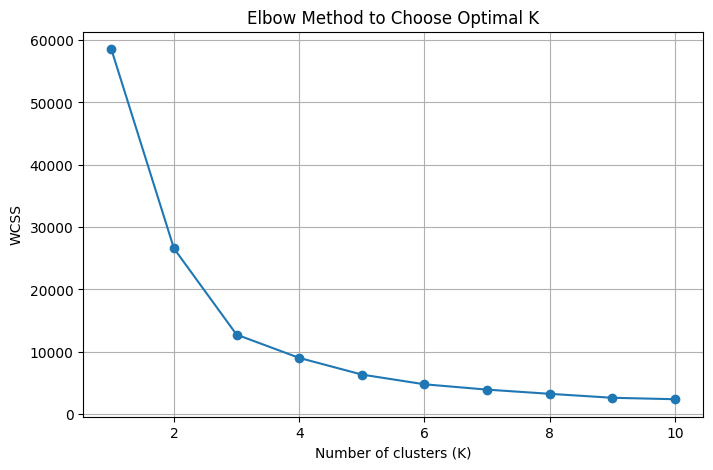

Chosen K: 3

Sample rows with cluster labels:
  yearly_income marital_status            education  Cluster
0   $30K - $50K              M  Partial High School        0
1   $70K - $90K              S  Partial High School        0
2   $50K - $70K              M     Bachelors Degree        1
3   $10K - $30K              M  Partial High School        0
4   $30K - $50K              S      Partial College        0
5   $70K - $90K              S     Bachelors Degree        1
6   $30K - $50K              M  Partial High School        0
7   $50K - $70K              M     Bachelors Degree        1
8   $10K - $30K              M  Partial High School        0
9   $30K - $50K              S     Bachelors Degree        1


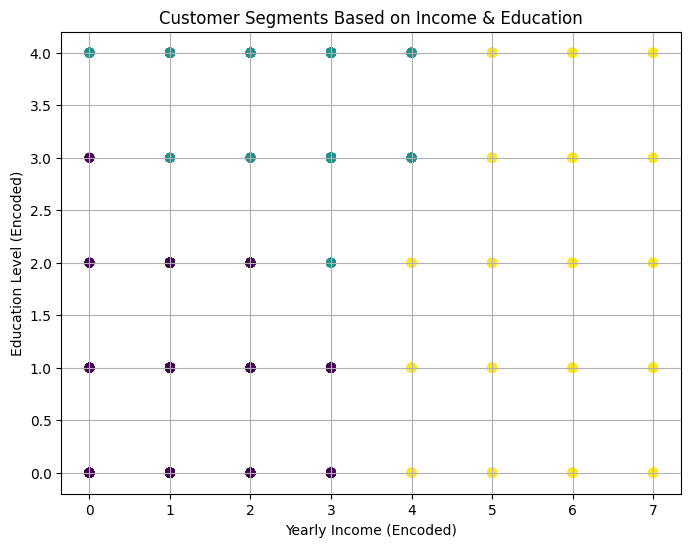

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("MavenMarket_Customers.csv")

features = df[["yearly_income", "education"]]

print("Original selected data:")
print(features.head())

features["yearly_income"] = features["yearly_income"].map({'$30K - $50K':1, '$70K - $90K':3, '$50K - $70K':2, '$10K - $30K':0,
       '$90K - $110K':4, '$110K - $130K':5, '$130K - $150K':6, '$150K +':7})

features["education"] = features["education"].map({'Partial High School':0, 'Bachelors Degree':4, 'Partial College':2,
       'High School Degree':1, 'Graduate Degree':3})

# le_income = LabelEncoder()
# le_marital = LabelEncoder()
# le_edu = LabelEncoder()

# features["yearly_income"] = le_income.fit_transform(features["yearly_income"])
# features["marital_status"] = le_marital.fit_transform(features["marital_status"])
# features["education"] = le_edu.fit_transform(features["education"])

#print("\nEncoded data:")
print(features.head())

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o")
plt.title("Elbow Method to Choose Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


optimal_k = 3
print("Chosen K:", optimal_k)



kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(features)

print("\nSample rows with cluster labels:")
print(df[["yearly_income", "marital_status", "education", "Cluster"]].head(10))



plt.figure(figsize=(8, 6))

plt.scatter(
    features["yearly_income"], 
    features["education"], 
    c=df["Cluster"], 
    cmap="viridis"
)

plt.xlabel("Yearly Income (Encoded)")
plt.ylabel("Education Level (Encoded)")
plt.title("Customer Segments Based on Income & Education")
plt.grid(True)
plt.show()


In [7]:
df["education"].unique()

array(['Partial High School', 'Bachelors Degree', 'Partial College',
       'High School Degree', 'Graduate Degree'], dtype=object)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

df = pd.read_csv("MavenMarket_Customers.csv")

X = df[["yearly_income", "marital_status", "education"]].copy()

le_income = LabelEncoder()
le_marital = LabelEncoder()
le_edu = LabelEncoder()

X["yearly_income"] = le_income.fit_transform(X["yearly_income"])
X["marital_status"] = le_marital.fit_transform(X["marital_status"])
X["education"] = le_edu.fit_transform(X["education"])

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train)

train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test)

train_result = X_train.copy()
train_result["Cluster"] = train_clusters

test_result = X_test.copy()
test_result["Cluster"] = test_clusters

print("\nTrain sample:")
print(train_result.head())

print("\nTest sample:")
print(test_result.head())

wcss_train = kmeans.inertia_ 
sil_train = silhouette_score(X_train, train_clusters)
sil_test = silhouette_score(X_test, test_clusters)

dbi_train = davies_bouldin_score(X_train, train_clusters)
dbi_test = davies_bouldin_score(X_test, test_clusters)

print("\nWCSS (Train):", wcss_train)
print("Silhouette Score - Train:", sil_train)
print("Silhouette Score - Test :", sil_test)
print("Davies–Bouldin Index - Train:", dbi_train)
print("Davies–Bouldin Index - Test :", dbi_test)



Train sample:
      yearly_income  marital_status  education  Cluster
8064              4               0          2        0
1554              0               0          4        1
4128              1               0          0        1
4092              2               0          2        0
9842              6               0          0        2

Test sample:
      yearly_income  marital_status  education  Cluster
4295              5               0          0        2
9444              5               1          0        2
1084              4               1          4        0
3894              0               0          4        1
1360              5               1          0        2

WCSS (Train): 14104.128195760753
Silhouette Score - Train: 0.5303486552332466
Silhouette Score - Test : 0.5422640485159186
Davies–Bouldin Index - Train: 0.7561254607169093
Davies–Bouldin Index - Test : 0.741533851458688
